In [ ]:
# Bibliotecas necessárias

import os.path
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
import torchvision
import torchvision.transforms as transforms

In [ ]:
# Definindo as classes

classes = [
    'weapon', 'dagger', 'drugs', 'knife', 'scissors', 'airplane', 'bus',
    'train', 'computer pouch', 'boat', 'traffic light', 'fire hydrant', 'street sign',
    'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse',
    'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'hat', 'backpack',
    'truck', 'shoe', 'eye glasses', 'handbag', 'tie', 'bag travel', 'frisbee',
    'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove',
    'skateboard', 'bootle', 'tennis racket', 'key', 'plate', 'wine glass',
    'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich',
    'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair',
    'couch', 'potted plant', 'bed', 'mirror', 'dining table', 'window', 'desk',
    'toilet', 'door', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'book',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'cell phone', 'scissors',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush', 'hair brush']

In [ ]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 119MB/s]


In [ ]:
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [ ]:
# Criando a imagem do modelo Faster RCNN
img = cv2.imread('/content/N0053486.jpg')
transform = transforms.Compose([transforms.ToPILImage(), transforms.ToTensor()])
nn_input = transform(img)

In [ ]:
output = model([nn_input])

In [ ]:
output

[{'boxes': tensor([[173.6376, 283.9425, 261.2157, 472.3680],
          [276.3422, 215.8633, 588.6918, 452.6756],
          [237.4212, 226.7047, 599.6719, 470.5753],
          [174.1828, 278.6947, 265.0050, 482.1158],
          [ 22.3528, 174.6206, 594.0462, 510.1495],
          [ 71.7236, 203.0999, 601.0728, 492.7177],
          [432.0013, 240.8349, 450.9640, 257.7272],
          [268.4536, 179.2229, 460.2652, 477.3632],
          [  1.6205, 275.1748, 635.0000, 545.9818],
          [ 24.3220, 188.9844, 298.2391, 521.6069],
          [217.7147, 285.5230, 262.9452, 458.1221],
          [ 26.6883, 197.3294, 264.1304, 514.6272],
          [233.1528, 289.4526, 257.6819, 423.9372],
          [250.9390, 424.4174, 267.3140, 443.2103],
          [239.5280, 229.1972, 611.1138, 462.5668],
          [171.6252, 257.7979, 262.3048, 483.5288],
          [217.3302, 284.3473, 259.8702, 461.8594],
          [338.3142, 296.4061, 431.1687, 434.2719],
          [ 97.7130, 279.0969, 119.0686, 298.0200],
   

In [ ]:
# Passa a imagem pelo modelo
image = cv2.imread('/content/N0053486.jpg')

# Converte a imagem para um tensor
def faster_rcnn(image, model):
    image_tensor = cv2.dnn.blobFromImage(image, size=(300, 300), mean=(104.0, 117.0, 123.0), swapRB=True)
    model.setInput(image_tensor)
    predictions = model.forward()

In [ ]:
# Converte a imagem para um tensor
def faster_rcnn(image, model):
    image_tensor = cv2.dnn.blobFromImage(image, size=(300, 300), mean=(104.0, 117.0, 123.0), swapRB=True)
    model.setInput(image_tensor)
    predictions = model.forward()

    # Executa o algoritmo Faster RCNN na imagem
    detections = model.predictions(image)

    # Exibe os resultados da detecção
    for detection in detections:
        x1, y1, x2, y2 = detection["bounding_box"]
        label = detection["label"]

        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(image, label, (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0))

    cv2.imshow("Imagem com detecção de objetos", image)

In [ ]:
colors = np.random.uniform(0, 255, size=(len(classes), 3))

for box, box_class, score in zip(output[0]['boxes'].detach().numpy(), output[0]['labels'].detach().numpy(), output[0]['scores'].detach().numpy()):
  box = [(int(box[0]), int(box[1])), (int(box[2]), int(box[3]))]
  color = colors[box_class]
  class_name = classes[box_class]
  # Anotações na imagem
  cv2.rectangle(img, box[0], box[1], color=color, thickness=2)
  cv2.putText(img=img, text=class_name, org=box[0], fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=color, thickness=2)

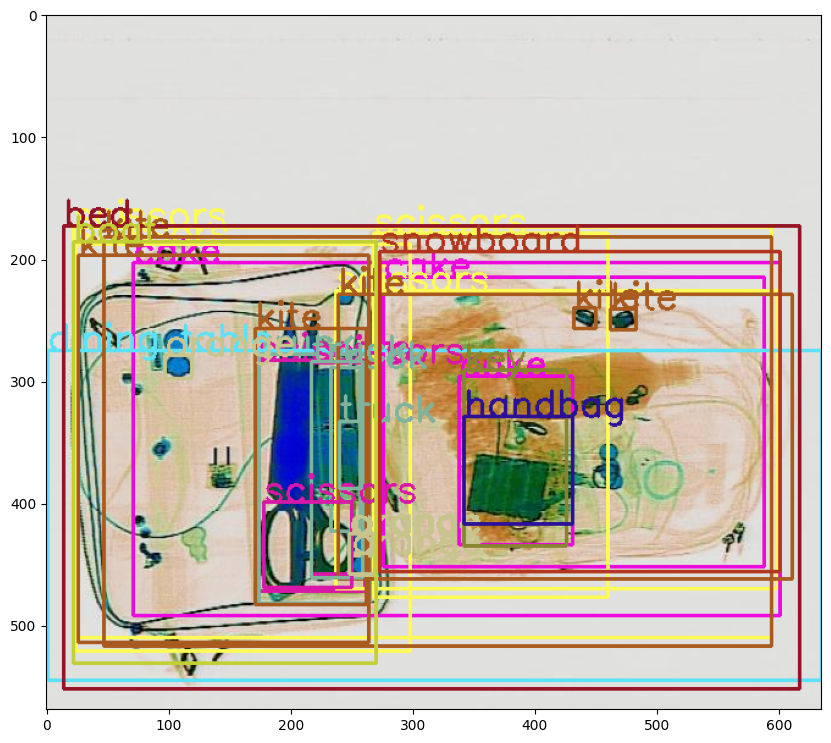

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
img = cv2.imread('/content/N0053486.jpg')
colors = np.random.uniform(0, 255, size=(len(classes), 3))

for box, box_class, score in zip(output[0]['boxes'].detach().numpy(), output[0]['labels'].detach().numpy(), output[0]['scores'].detach().numpy()):
  if score > 0.5:
    box = [(int(box[0]), int(box[1])), (int(box[2]), int(box[3]))]
    color = colors[box_class]
    class_name = classes[box_class]
    # Anotações na imagem
    cv2.rectangle(img, box[0], box[1], color=color, thickness=2)
    cv2.putText(img=img, text=class_name, org=box[0], fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=color, thickness=2)

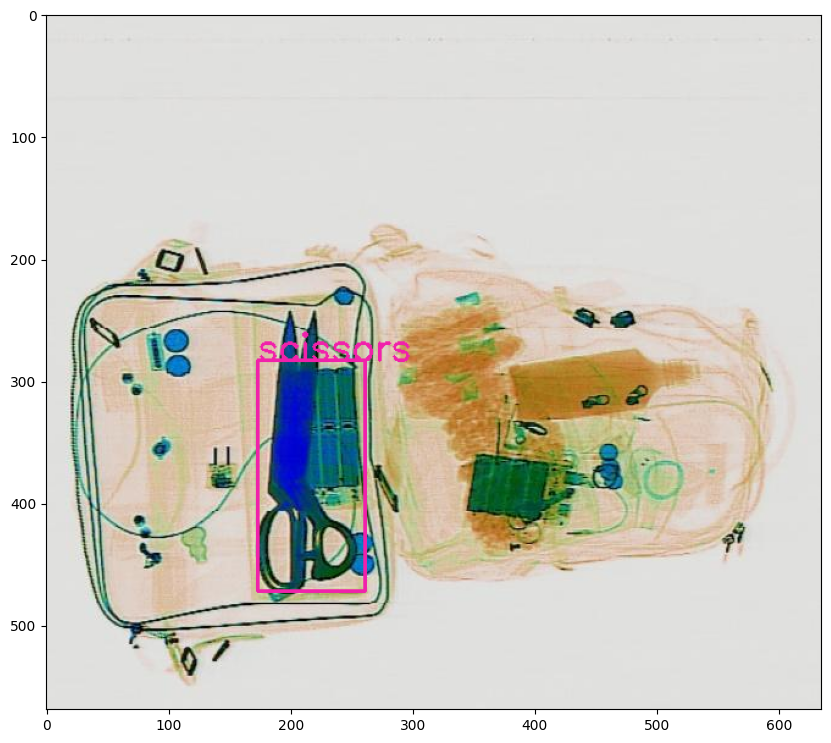

In [ ]:
# scissors - tesoura
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
import cv2
import torchvision
from sklearn.metrics import precision_score, recall_score, f1_score
import torchvision.transforms as transforms

# Carrega a imagem
image = cv2.imread("/content/N0053486.jpg")

# Carrega o modelo
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# predição do modelo
# Converte a imagem para um tensor
def faster_rcnn(image, model):
    image_tensor = cv2.dnn.blobFromImage(image, size=(300, 300), mean=(104.0, 117.0, 123.0), swapRB=True)
    model.setInput(image_tensor)
    predictions = model.forward()

# Anotações verdadeiras
true_labels = [0, 1, 1, 2, 2, 3, 4, 4, 4, 5]

# Previsões do modelo
predicted_labels = [0, 1, 2, 2, 3, 3, 4, 5, 5, 6]


# Calcular a precisão
precision = precision_score(true_labels, predicted_labels, average='weighted')

# Calcular a revocação
recall = recall_score(true_labels, predicted_labels, average='weighted')

# Calcular o F1-score
f1 = f1_score(true_labels, predicted_labels, average='weighted')

print("Precisão: {:.2f}".format(precision))
print("Revocação: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1))

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Precisão: 0.75
Revocação: 0.50
F1-score: 0.55


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
